In [13]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
import matplotlib.cm as mcm
import scipy.stats as sts
from matplotlib import ticker
import numpy.ma as nma
from sklearn import linear_model
from scipy.interpolate import CubicSpline,Akima1DInterpolator
from sklearn.feature_selection import mutual_info_regression
from astropy.io import fits
from astropy.table import Table

plt.style.use('./presentation.mplstyle')


In [2]:
sources = pd.read_csv('v1saga_dwarfs.csv')
print(sources.shape)

smorph = pd.read_csv('saga_morph.csv')
print(smorph.shape)

(6337, 26)
(6211, 78)


In [23]:
rd2deg = (180*3600)/np.pi

#mst = sources['logM'].iloc[morph_all[high_snr,i,0]]
#zspec = sources['zspec'].iloc[morph_all[high_snr,i,0]]
#res = 1e6*(0.262*cosmo.comoving_distance(zspec).value)/rd2deg

bands = {'g':[mcm.Blues,'tab:blue'],'r':[mcm.Greens,'tab:green'],'i':[mcm.Oranges,'tab:orange'],'z':[mcm.Reds,'tab:red']}
positions = [0, 1, 2, 3]
labels = [r'${\it g}$', r'${\it r}$', r'${\it i}$', r'${\it z}$']

npr = {'gini':[[0.4,0.6],r'${\it Gini}$',r'${\it G}$'],'m20':[[-2,-1],r'$M_{20}$',r'$M_{20}$'],'c':[[2,3.5],r'$Concentration$',r'${\it C}$'],'a':[[-0.4,0.4],r'$Asymmetry$',r'${\it A}$'],'s':[[-0.1,0.1],r'$Smoothness$',r'${\it S}$'],'rpetro':[[0,20],r'$R_p$',r'$R_p$']}
ser = {'n':[[0.0,5],r'$Sersic\ n$',r'${\it n}$'],'rhalf':[[0,20],r'$R_{0.5}$',r'$R_{0.5}$']}

def BGM(G,M20): return -0.693*M20 + 4.95*G - 3.96

(5965, 78)
(4645, 78)
(5873, 78)
(4482, 78)
(3363, 78)
(2500, 78)
(4431, 78)
(3265, 78)


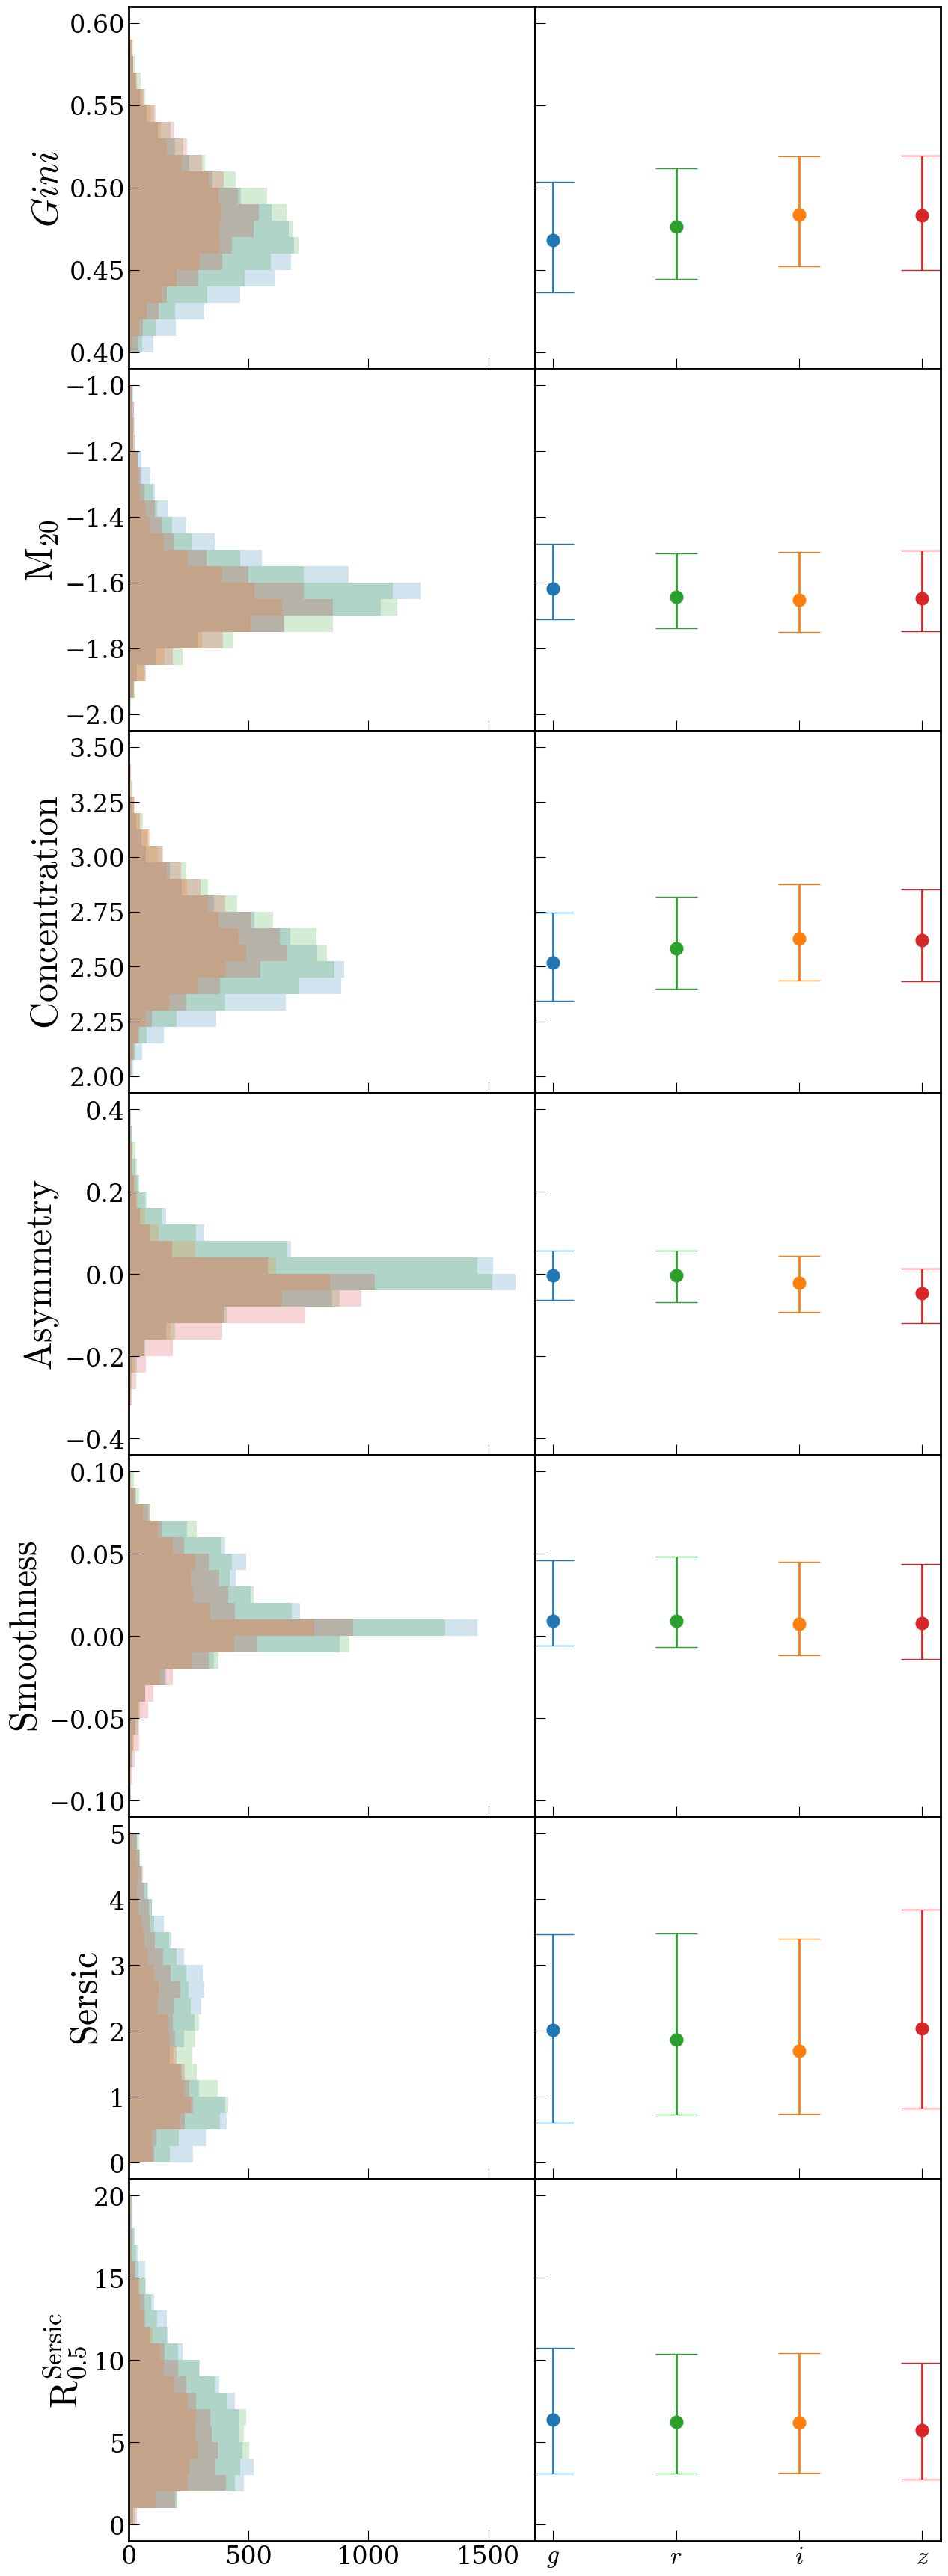

In [10]:
fig,ax=plt.subplots(7,2,figsize=(14,44),sharex='col',sharey='row')

median_arr = np.zeros((4,5))

for i,key in enumerate(bands):
    #print(morph_arr[:,-1])
    selc = smorph[(smorph['snr_pix_'+key]>2)&(smorph['flag_'+key]<=1)]
    print(selc.shape)
    #if i==2: selc = np.where((morph_all[:,i,9]==0)&(morph_all[:,i,10]>=2)&(~np.isnan(sources['m_i0'].iloc[morph_all[:,i,0]])))[0]

    for j,ley in enumerate(npr):
        ax[j,0].hist(selc[ley+'_'+key],bins=np.linspace(npr[ley][0][0],npr[ley][0][1],21),alpha=0.2,color=bands[key],orientation='horizontal')

        median_arr[i,j] = np.median(selc[ley+'_'+key])
        ax[j,1].errorbar(i,median_arr[i,j],yerr=np.array([median_arr[i,j]-np.percentile(selc[ley+'_'+key],16),np.percentile(selc[ley+'_'+key],84)-median_arr[i,j]]).reshape(2,1),color=bands[key],marker='o',markersize=12,elinewidth=2,capsize=20)

    selc = smorph[(smorph['snr_pix_'+key]>2)&(smorph['flag_ss_'+key]<=1)]
    print(selc.shape)
    
    for j,ley in enumerate(ser):
        ax[j+5,0].hist(selc[ley+'_'+key],bins=np.linspace(ser[ley][0][0],ser[ley][0][1],21),alpha=0.2,color=bands[key],orientation='horizontal')

        median_arr[i,j] = np.median(selc[ley+'_'+key])
        ax[j+5,1].errorbar(i,median_arr[i,j],yerr=np.array([median_arr[i,j]-np.percentile(selc[ley+'_'+key],16),np.percentile(selc[ley+'_'+key],84)-median_arr[i,j]]).reshape(2,1),color=bands[key],marker='o',markersize=12,elinewidth=2,capsize=20)

ax[-1,1].xaxis.set_major_locator(ticker.FixedLocator(positions))
ax[-1,1].xaxis.set_major_formatter(ticker.FixedFormatter(labels))

ax[0,0].set_ylabel(r'${\it Gini}$',fontsize=36)
ax[1,0].set_ylabel(r'$M_{20}$',fontsize=36)
ax[2,0].set_ylabel(r'$Concentration$',fontsize=36)
ax[3,0].set_ylabel(r'$Asymmetry$',fontsize=36)
ax[4,0].set_ylabel(r'$Smoothness$',fontsize=36)
ax[5,0].set_ylabel(r'$Sersic$',fontsize=36)
ax[6,0].set_ylabel(r'$R^{Sersic}_{0.5}$',fontsize=36)

plt.subplots_adjust(hspace=0.0,wspace=0.0)
plt.savefig('NPdistributions.pdf',bbox_inches='tight')

/var/folders/_b/znph9d951ln009y69l1s4tn00000gn/T/ipykernel_16397/1596299283.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_scores[i,j-1] = mutual_info_regression(selc[ley+'_'+key].values[:, np.newaxis], selc[ley+'_g'].values)
/var/folders/_b/znph9d951ln009y69l1s4tn00000gn/T/ipykernel_16397/1596299283.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_scores[i,j-1] = mutual_info_regression(selc[ley+'_'+key].values[:, np.newaxis], selc[ley+'_g'].values)
/var/folders/_b/znph9d951ln009y69l1s4tn00000gn/T/ipykernel_16397/1596299283.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will 

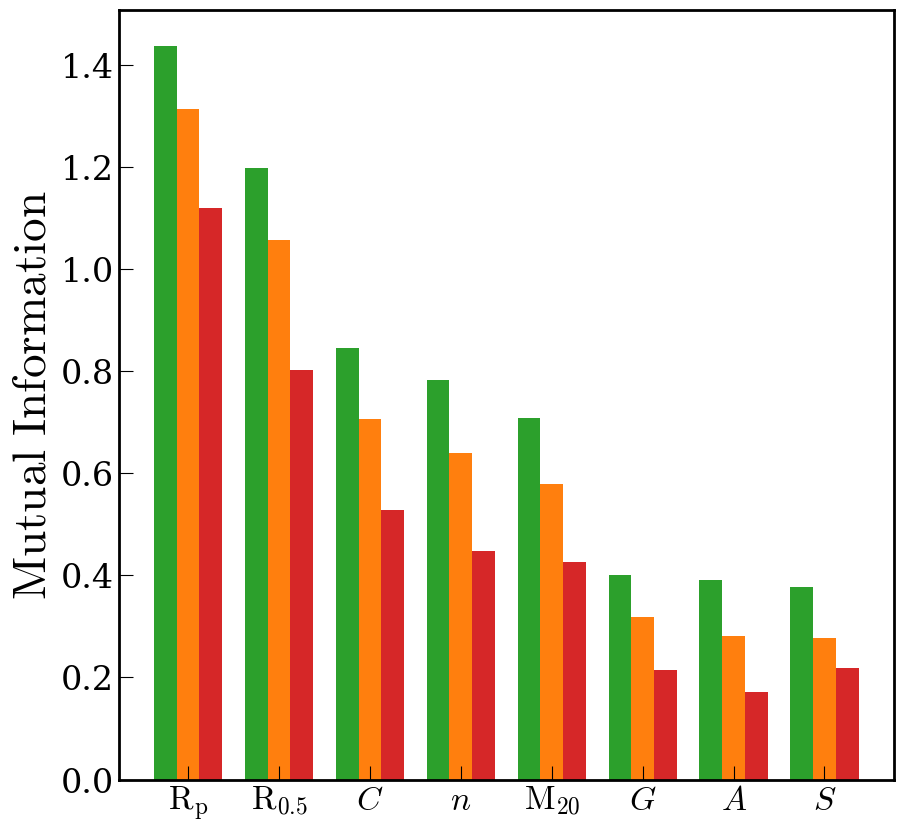

In [49]:
fig,ax=plt.subplots(figsize=(10,10))

mi_scores = np.ones((8,3))
param_pos = np.arange(8)
param_label = []

                     
for i,ley in enumerate(npr):
    for j,key in enumerate(bands):
        if j>0: 
            selc = smorph[(smorph['snr_pix_'+key]>2)&(smorph['flag_'+key]<=1)&(smorph['snr_pix_g']>2)&(smorph['flag_g']<=1)]
            #print(selc.shape)
            mi_scores[i,j-1] = mutual_info_regression(selc[ley+'_'+key].values[:, np.newaxis], selc[ley+'_g'].values)
    param_label.append(npr[ley][2])

                     
for i,ley in enumerate(ser):
    for j,key in enumerate(bands):
        if j>0:
            selc = smorph[(smorph['snr_pix_'+key]>2)&(smorph['flag_ss_'+key]<=1)&(smorph['snr_pix_g']>2)&(smorph['flag_ss_g']<=1)]
            #print(selc.shape)        
            mi_scores[i+6,j-1] = mutual_info_regression(selc[ley+'_'+key].values[:, np.newaxis], selc[ley+'_g'].values)
    param_label.append(ser[ley][2])

width = 0.25  # the width of the bars
multiplier = 0

sorted_ind = np.flip((np.argsort(mi_scores[:,0])))
sorted_mi,sorted_lab = mi_scores[sorted_ind,:],[param_label[k] for k in sorted_ind]
    
for j,key in enumerate(bands):
    if j>0:
        offset = width * multiplier
        ax.bar(param_pos + offset, sorted_mi[:,j-1], width,color=bands[key][1])
        multiplier += 1    
ax.set_xticks(param_pos+width, labels=sorted_lab)
ax.set_ylabel(r'${\rm Mutual\ Information}$',fontsize=40)


plt.savefig('MIdistributions.pdf',bbox_inches='tight')

/var/folders/_b/znph9d951ln009y69l1s4tn00000gn/T/ipykernel_16397/2195534693.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_scores[i,j] = mutual_info_regression(selc[ley+'_'+key].values[:, np.newaxis], mst)
/var/folders/_b/znph9d951ln009y69l1s4tn00000gn/T/ipykernel_16397/2195534693.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mi_scores[i,j] = mutual_info_regression(selc[ley+'_'+key].values[:, np.newaxis], mst)
/var/folders/_b/znph9d951ln009y69l1s4tn00000gn/T/ipykernel_16397/2195534693.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a si

Text(0, 0.5, '${\\rm Mutual\\ Information}$')

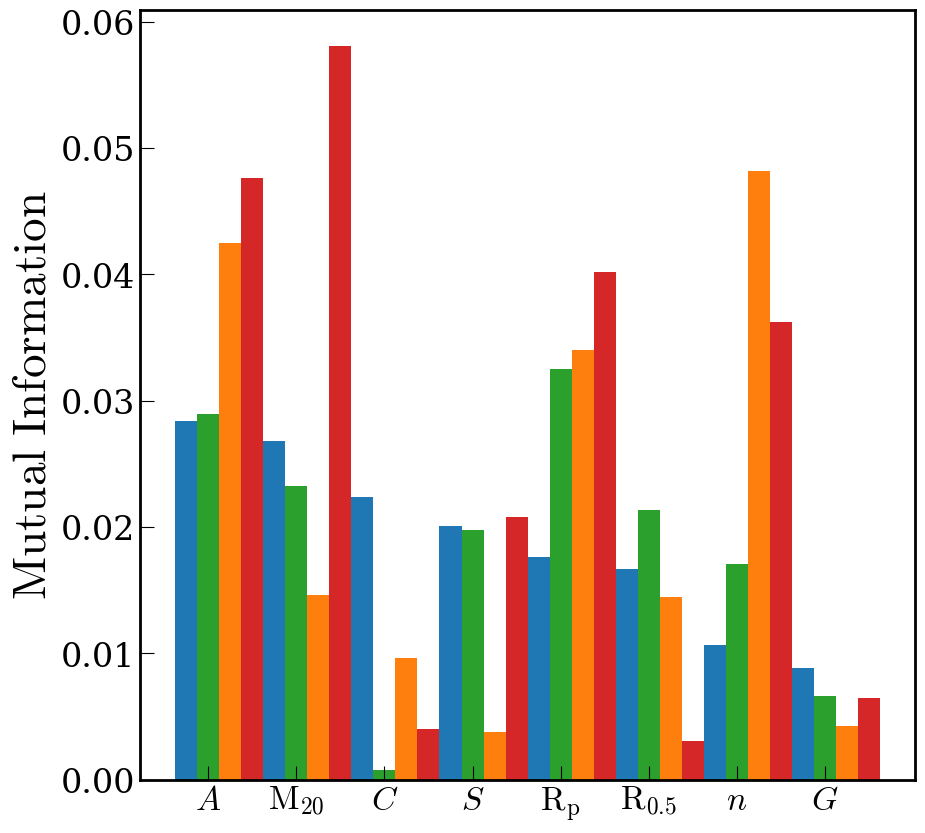

In [52]:
fig,ax=plt.subplots(figsize=(10,10))

mi_scores = np.ones((8,4))
param_pos = np.arange(8)
param_label = []

for i,ley in enumerate(npr):
    for j,key in enumerate(bands):
            selc = smorph[(smorph['snr_pix_'+key]>2)&(smorph['flag_'+key]<=1)]
            mst = sources['logM'].iloc[selc['ind1']]
            #print(selc.shape)
            mi_scores[i,j] = mutual_info_regression(selc[ley+'_'+key].values[:, np.newaxis], mst)
    param_label.append(npr[ley][2])

                     
for i,ley in enumerate(ser):
    for j,key in enumerate(bands):
            selc = smorph[(smorph['snr_pix_'+key]>2)&(smorph['flag_ss_'+key]<=1)]
            mst = sources['logM'].iloc[selc['ind1']]
            #print(selc.shape)        
            mi_scores[i+6,j] = mutual_info_regression(selc[ley+'_'+key].values[:, np.newaxis], mst)
    param_label.append(ser[ley][2])


width = 0.25  # the width of the bars
multiplier = 0

sorted_ind = np.flip((np.argsort(mi_scores[:,0])))
sorted_mi,sorted_lab = mi_scores[sorted_ind,:],[param_label[k] for k in sorted_ind]
    
for j,key in enumerate(bands):
        offset = width * multiplier
        ax.bar(param_pos + offset, sorted_mi[:,j], width,color=bands[key][1])
        multiplier += 1    
ax.set_xticks(param_pos+width, labels=sorted_lab)
ax.set_ylabel(r'${\rm Mutual\ Information}$',fontsize=34)


#plt.savefig('MIdistributions.pdf',bbox_inches='tight')




In [17]:
mst_arr = np.linspace(6.75,10.25,21)
mst_bins = np.linspace(6.75,10.25,7)
mst_bw = 0.5*(mst_bins[1]-mst_bins[0])
mst_arr +=  0.5*(mst_arr[1]-mst_arr[0])

zsp_arr = np.linspace(0,0.1,21)
zsp_bins = np.linspace(0,0.1,7)
zsp_bw = 0.5*(zsp_bins[1]-zsp_bins[0])
zsp_arr +=  0.5*(zsp_arr[1]-zsp_arr[0])

(5965, 78)
(5873, 78)
(3363, 78)
(4431, 78)


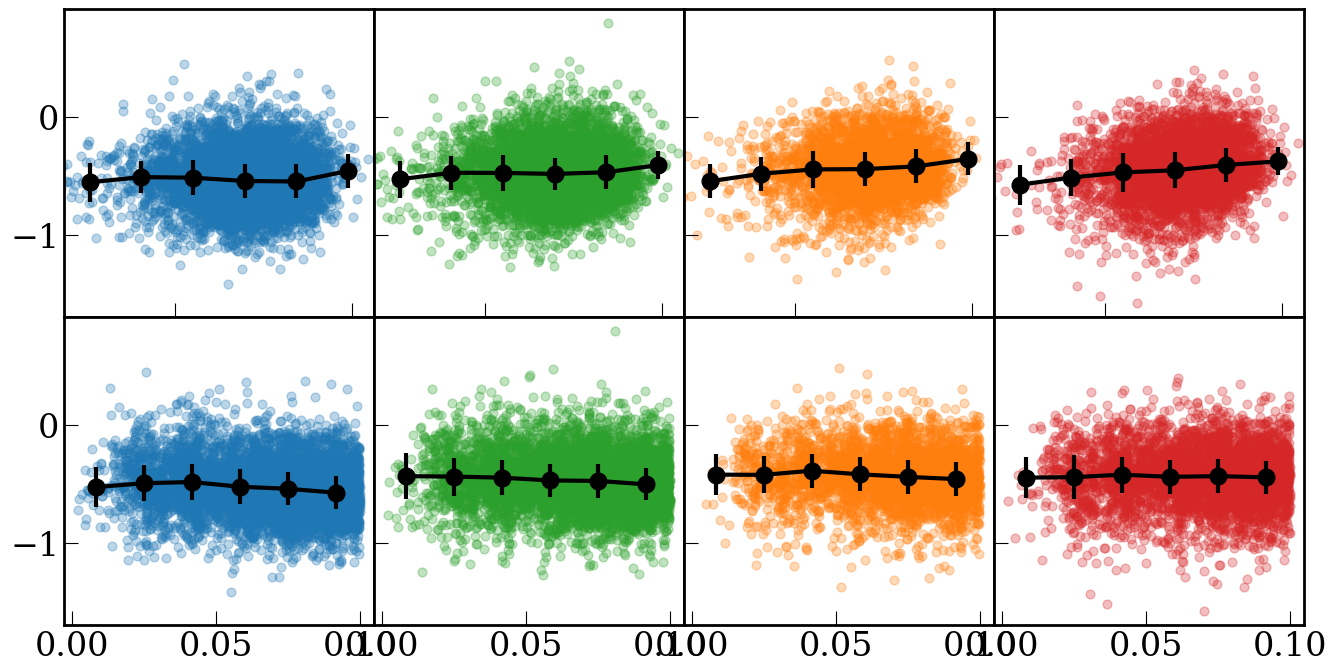

In [19]:
fig,ax=plt.subplots(2,4,figsize=(16,8),sharey='row',sharex='row')

for i,key in enumerate(bands):
    selc = smorph[(smorph['snr_pix_'+key]>2)&(smorph['flag_'+key]<=1)]
    print(selc.shape)
    mst = sources['logM'].iloc[selc['ind1']]
    zspec = sources['zspec'].iloc[selc['ind1']]
    bulge = BGM(selc['gini_'+key],selc['m20_'+key])

    ax[0,i].scatter(mst,bulge,alpha=0.3,color=bands[key][1],s=40)
    ax[0,i].set_xlim((6.75,10.25))
    #ax[1,i].set_xlim((6.75,10.25))
    ax[1,i].scatter(zspec,bulge,alpha=0.3,color=bands[key][1],s=40)

    
    bin_meds, bin_edges, binnumber = sts.binned_statistic(mst,bulge, statistic='median', bins=mst_bins)
    bin_mads, bin_edges, binnumber = sts.binned_statistic(mst,bulge, statistic=sts.median_abs_deviation, bins=mst_bins)

    ax[0,i].errorbar(mst_bins[:-1]+mst_bw,bin_meds,yerr=bin_mads,color='black',marker='o',lw=3,markersize=12,elinewidth=3)

    bin_meds, bin_edges, binnumber = sts.binned_statistic(zspec,bulge, statistic='median', bins=zsp_bins)
    bin_mads, bin_edges, binnumber = sts.binned_statistic(zspec,bulge, statistic=sts.median_abs_deviation, bins=zsp_bins)

    ax[1,i].errorbar(zsp_bins[:-1]+zsp_bw,bin_meds,yerr=bin_mads,color='black',marker='o',lw=3,markersize=12,elinewidth=3)

    '''
    spline_func = [CubicSpline(mst_bins[:-1]+mst_bw,bin_meds),CubicSpline(mst_bins[:-1]+mst_bw,bin_mads)]
    cs = [spline_func[0](mst_arr[:-1]),spline_func[1](mst_arr[:-1])]
    
    ax[1,i].plot(mst_arr[:-1],cs[0],color=bands[key][1],lw=3)
    ax[1,i].fill_between(mst_arr[:-1],cs[0]-cs[1],cs[0]+cs[1],color=bands[key][1],alpha=0.1)
    '''
plt.subplots_adjust(wspace=0.0,hspace=0.0)


(5965, 78)
(4645, 78)
(5873, 78)
(4482, 78)
(3363, 78)
(2500, 78)
(4431, 78)
(3265, 78)


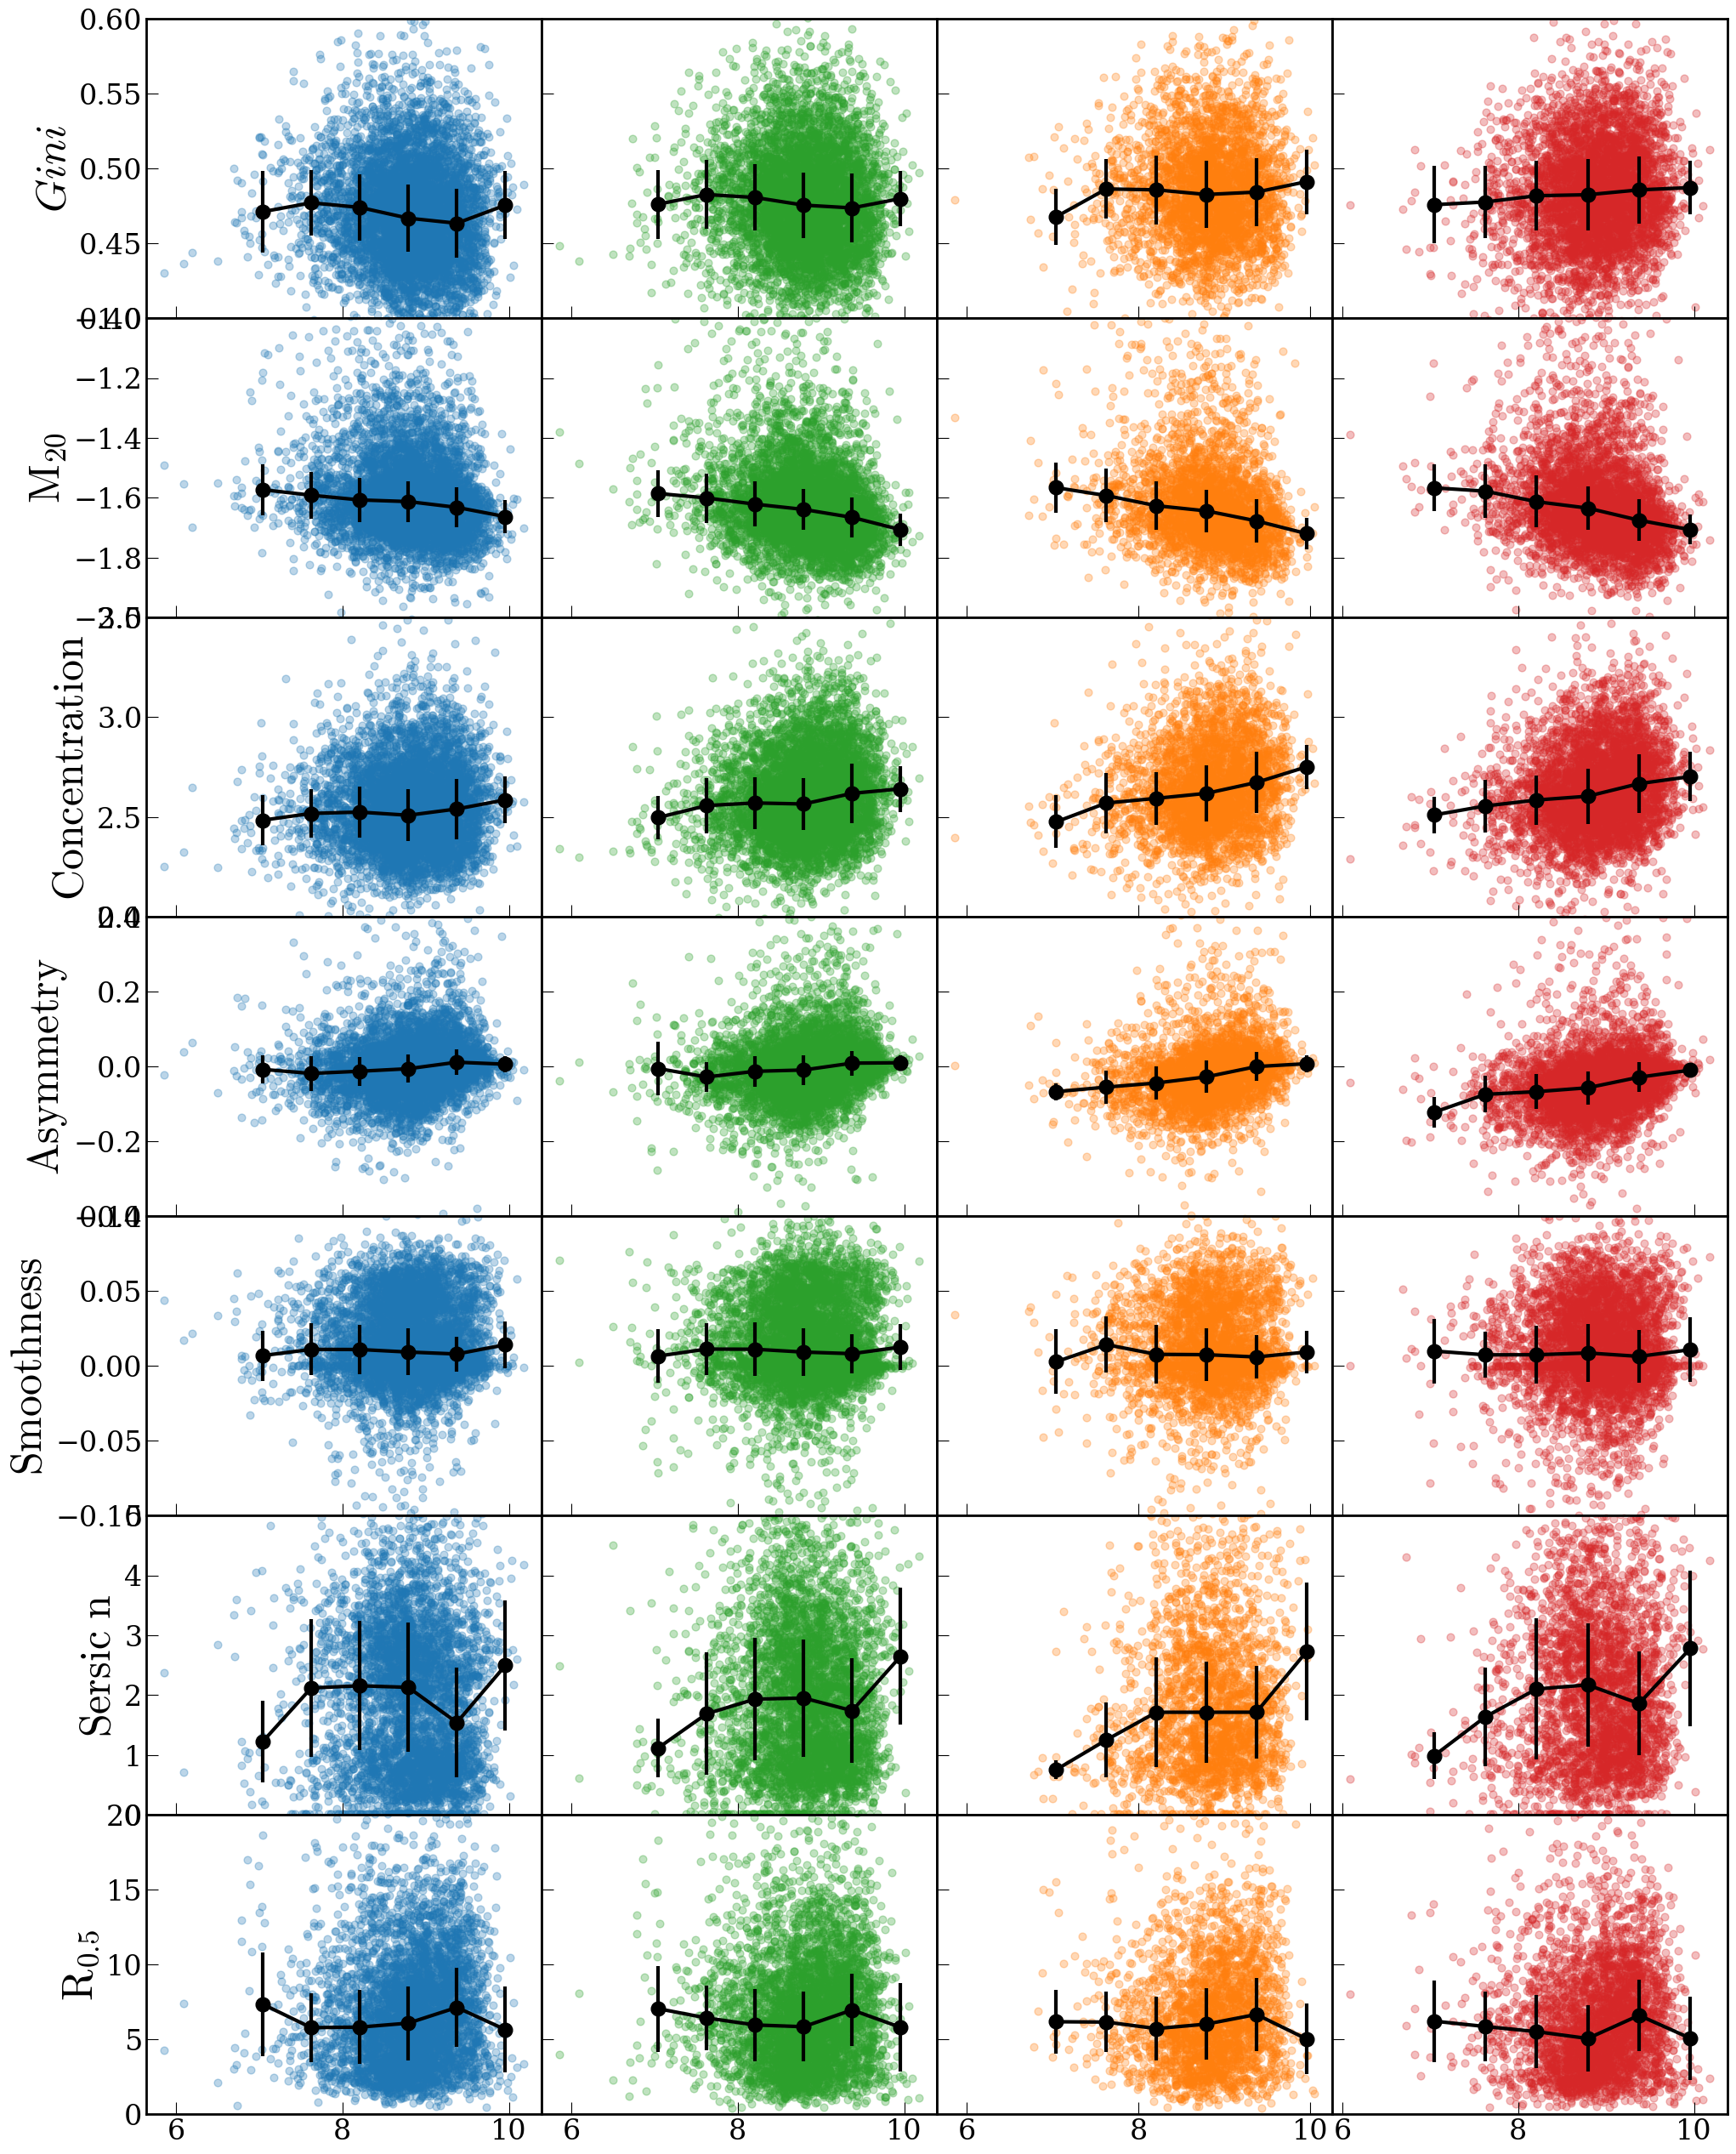

In [35]:
#high_snr = np.where(morph_all[:,0,1]<merger_line(morph_all[:,0,2]))[0]

fig1,ax1=plt.subplots(7,4,figsize=(24,32),sharey='row',sharex='col')


morph_meds,morph_mads = np.zeros((2,7,4,20)),np.zeros((2,7,4,20))


for i,key in enumerate(bands):
    selc = smorph[(smorph['snr_pix_'+key]>2)&(smorph['flag_'+key]<=1)]
    print(selc.shape)
    mst = sources['logM'].iloc[selc['ind1']]

    for j,ley in enumerate(npr):
        ax1[j,i].scatter(mst,selc[ley+'_'+key],alpha=0.3,color=bands[key],s=40)
        ax1[j,i].set_ylim((npr[ley][0][0],npr[ley][0][1]))

        
        bin_meds, bin_edges, binnumber = sts.binned_statistic(mst,selc[ley+'_'+key], statistic='median', bins=mst_bins)
        bin_mads, bin_edges, binnumber = sts.binned_statistic(mst,selc[ley+'_'+key], statistic=sts.median_abs_deviation, bins=mst_bins)

        ax1[j,i].errorbar(mst_bins[:-1]+mst_bw,bin_meds,yerr=bin_mads,color='black',marker='o',lw=3,markersize=12,elinewidth=3)

        cs = [CubicSpline(mst_bins[:-1]+mst_bw,bin_meds),CubicSpline(mst_bins[:-1]+mst_bw,bin_mads)]

        morph_meds[0,j,i,:],morph_mads[0,j,i,:] = cs[0](mst_arr[:-1]),cs[1](mst_arr[:-1])

        if i==0: ax1[j,0].set_ylabel( npr[ley][1],fontsize=36)


    selc = smorph[(smorph['snr_pix_'+key]>2)&(smorph['flag_ss_'+key]<=1)]
    print(selc.shape)
    mst = sources['logM'].iloc[selc['ind1']]

    for j,ley in enumerate(ser):
        ax1[j+5,i].scatter(mst,selc[ley+'_'+key],alpha=0.3,color=bands[key],s=40)
        ax1[j+5,i].set_ylim((ser[ley][0][0],ser[ley][0][1]))
    
        bin_meds, bin_edges, binnumber = sts.binned_statistic(mst,selc[ley+'_'+key], statistic='median', bins=mst_bins)
        bin_mads, bin_edges, binnumber = sts.binned_statistic(mst,selc[ley+'_'+key], statistic=sts.median_abs_deviation, bins=mst_bins)

        ax1[j+5,i].errorbar(mst_bins[:-1]+mst_bw,bin_meds,yerr=bin_mads,color='black',marker='o',lw=3,markersize=12,elinewidth=3)

        cs = [CubicSpline(mst_bins[:-1]+mst_bw,bin_meds),CubicSpline(mst_bins[:-1]+mst_bw,bin_mads)]
    
        morph_meds[0,j+5,i,:],morph_mads[0,j+5,i,:] = cs[0](mst_arr[:-1]),cs[1](mst_arr[:-1])

        if i==0: ax1[j+5,0].set_ylabel( ser[ley][1],fontsize=36)

    ax1[4,i].set_xlabel(r'${\rm log}(M_{\ast}/M_{\odot})$',fontsize=36)

plt.subplots_adjust(wspace=0.0,hspace=0.0)

#plt.savefig('NPdistributions2.pdf',bbox_inches='tight')

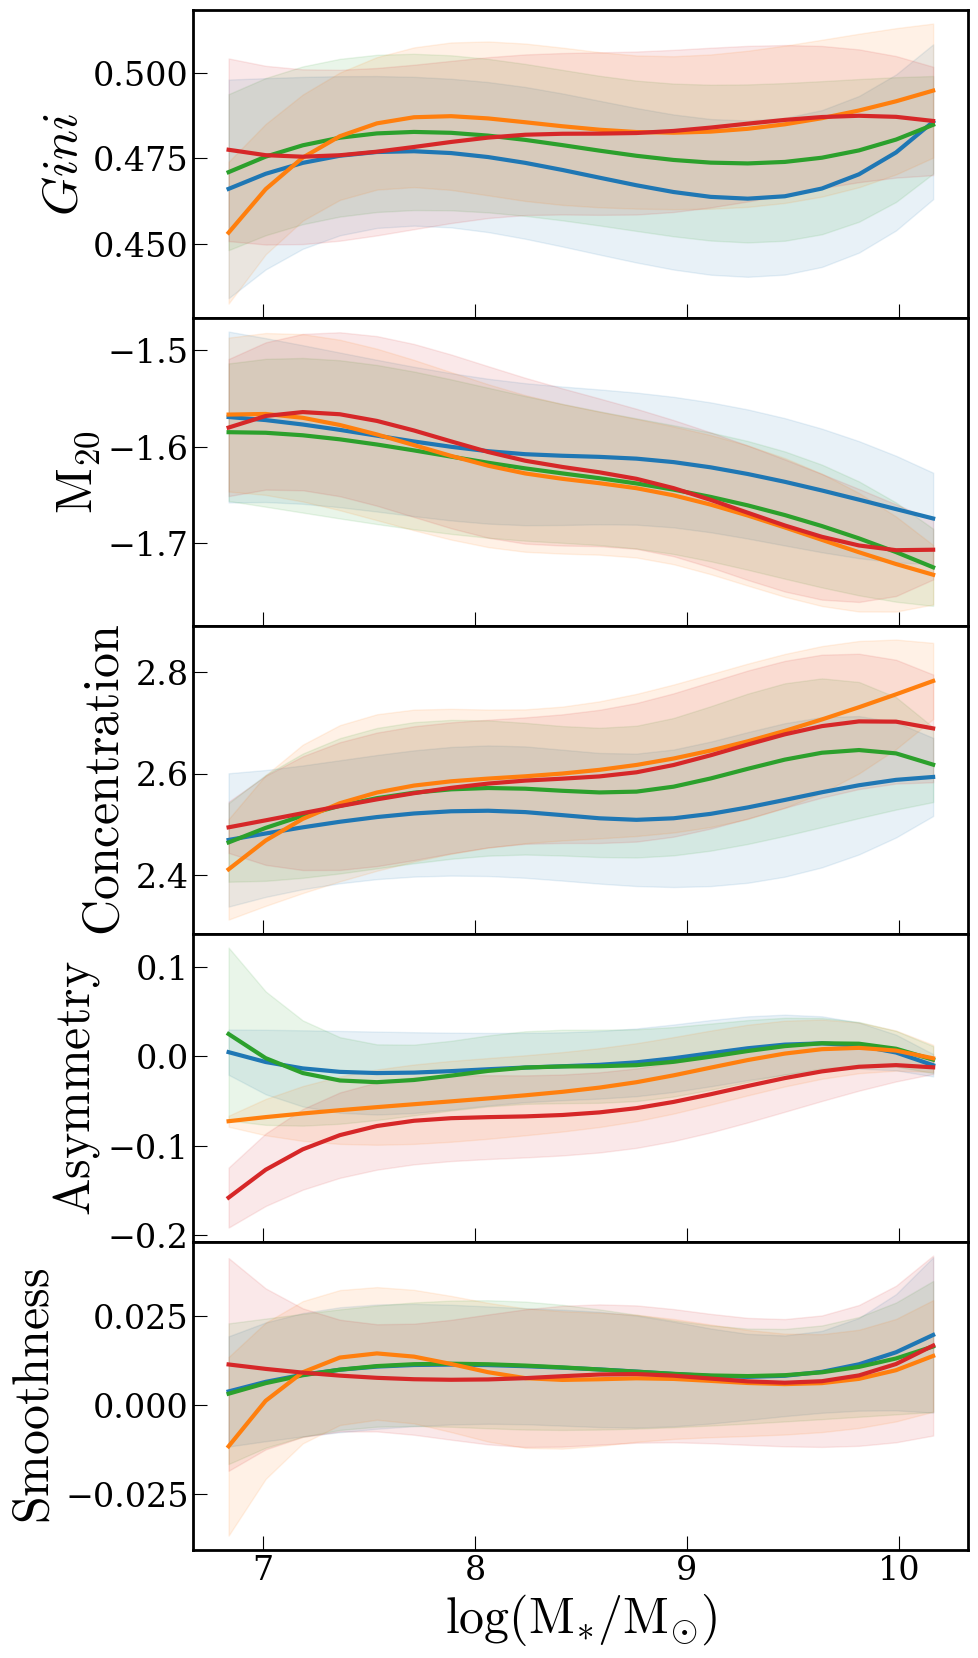

In [39]:
fig1,ax1=plt.subplots(5,1,figsize=(10,20),sharex='col',sharey='row')

for j,ley in enumerate(npr):
        for i,key in enumerate(bands):
            ax1[j].plot(mst_arr[:-1],morph_meds[0,j,i,:],color=bands[key],lw=3)
            ax1[j].fill_between(mst_arr[:-1],morph_meds[0,j,i,:]-morph_mads[0,j,i,:],morph_meds[0,j,i,:]+morph_mads[0,j,i,:],color=bands[key],alpha=0.1)

            #ax1[j,1].plot(gr_arr[:-1],morph_meds[1,j,i,:],color=griz_col[i],lw=3)
            #ax1[j,1].fill_between(gr_arr[:-1],morph_meds[1,j,i,:]-morph_mads[1,j,i,:],morph_meds[1,j,i,:]+morph_mads[1,j,i,:],color=griz_col[i],alpha=0.1)
            ax1[j].set_ylabel( npr[ley][1],fontsize=36)


ax1[-1].set_xlabel(r'${\rm log}(M_{\ast}/M_{\odot})$',fontsize=36)
#ax1[-1].set_xlabel(r'${\it g-r}$',fontsize=36)


plt.subplots_adjust(wspace=0.0,hspace=0.0)
plt.savefig('MorphlogMMedian.pdf',bbox_inches='tight')

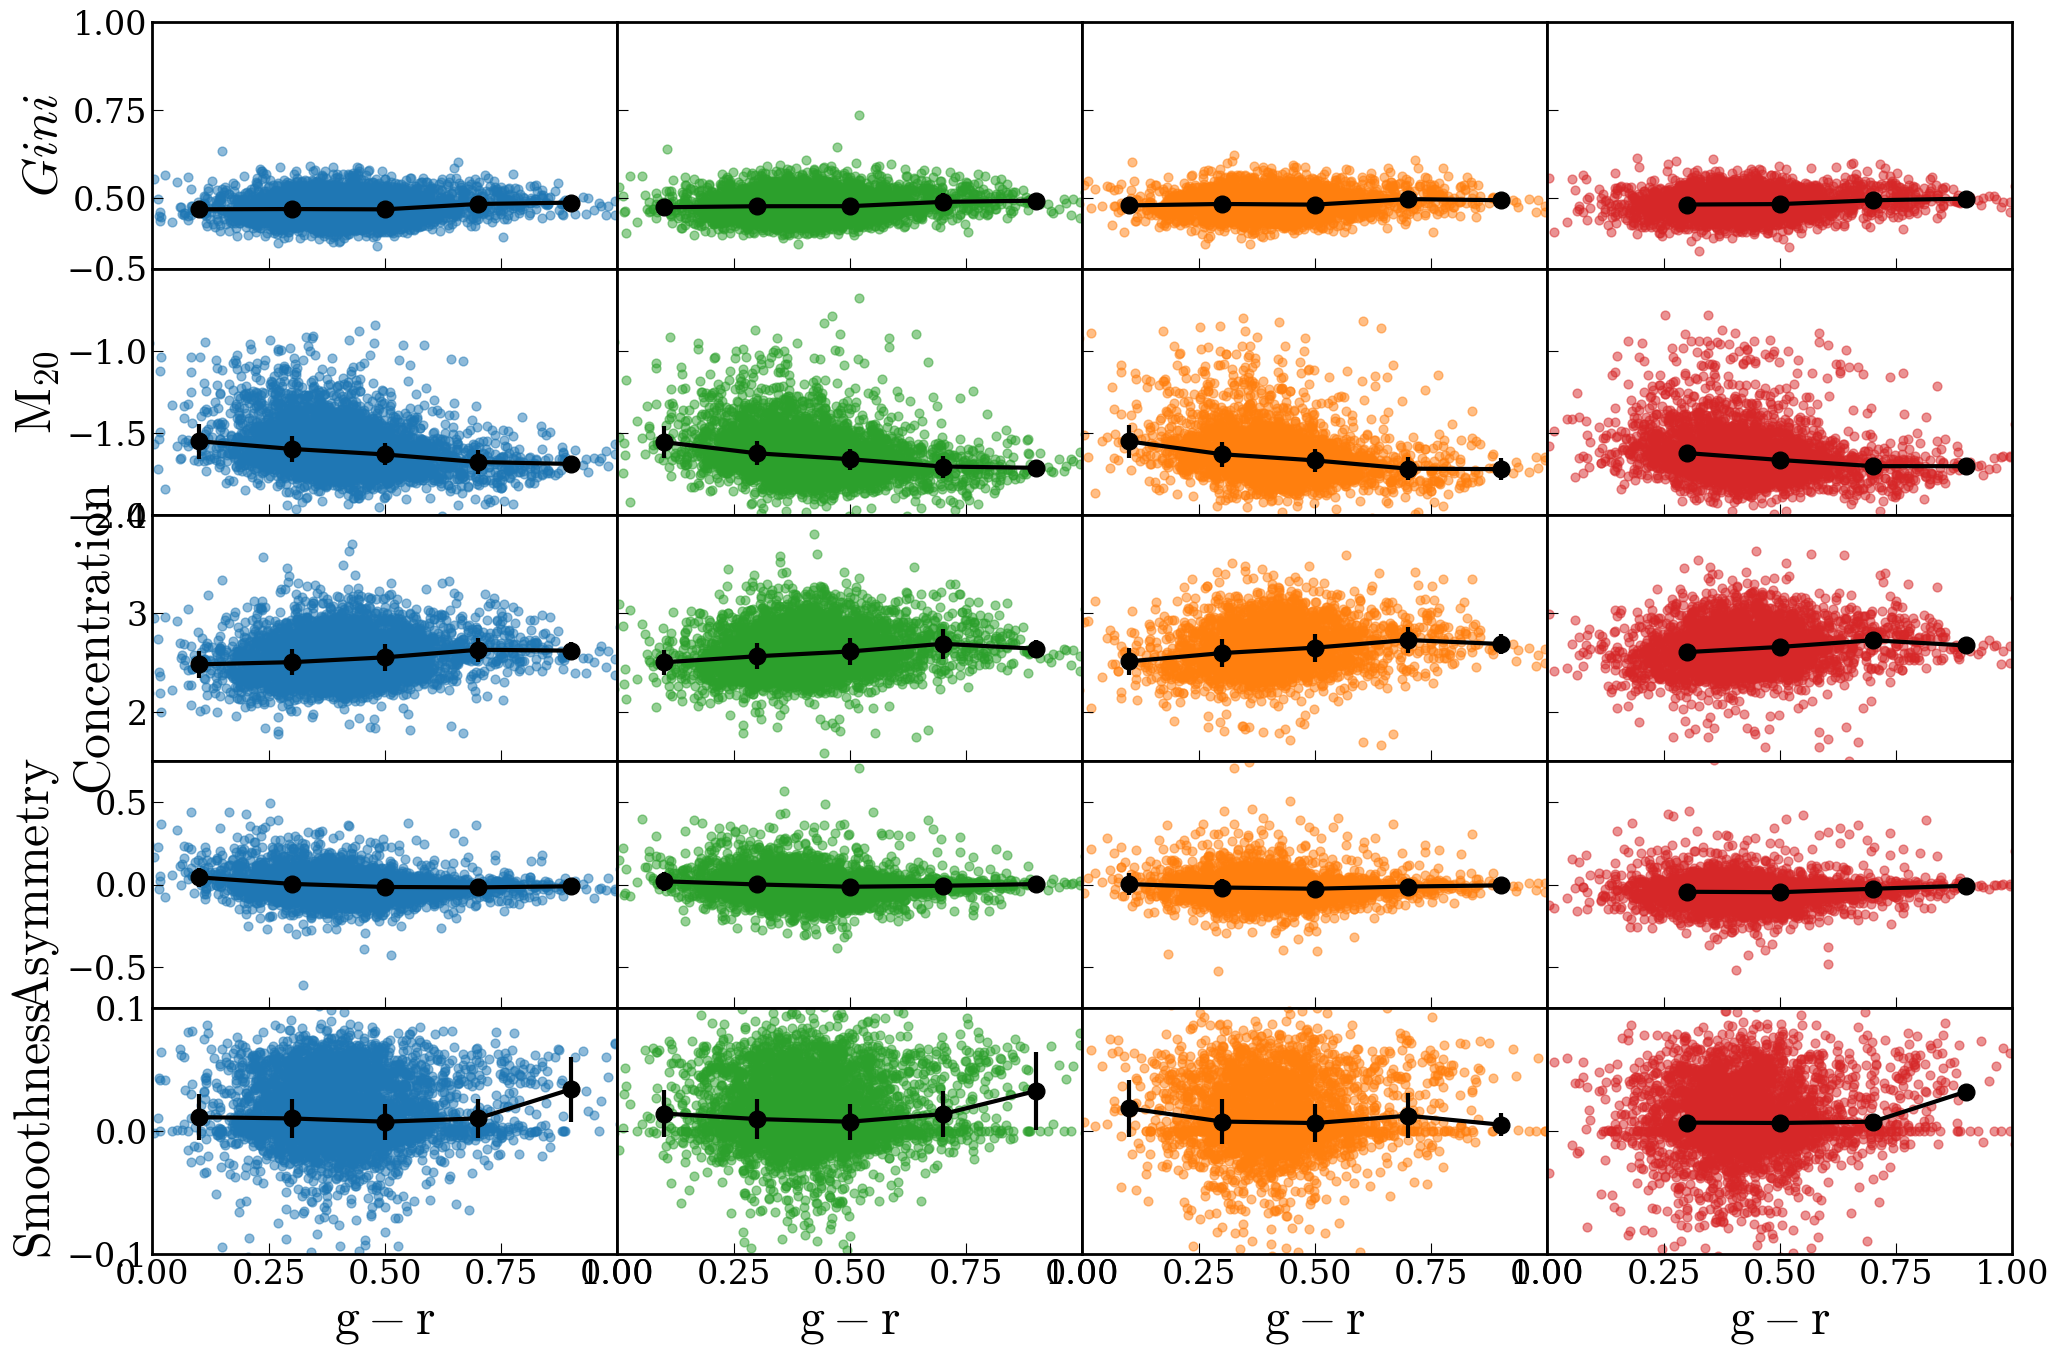

In [10]:
#high_snr = np.where(morph_all[:,0,1]<merger_line(morph_all[:,0,2]))[0]

fig1,ax1=plt.subplots(5,4,figsize=(24,16),sharey='row',sharex='col')

gr_arr = np.linspace(0,1,21)
gr_bins = np.linspace(0,1,6)
gr_bw = 0.5*(gr_bins[1]-gr_bins[0])
gr_arr +=  0.5*(gr_arr[1]-gr_arr[0]) 

#def linear(X,A):     return A[0]+A[1]*X[0]+A[2]*X[1]
#reg = linear_model.LinearRegression()

for i in range(4):
    #high_snr = np.where(morph_all[:,i,1]>merger_line(morph_all[:,i,2]))[0]
    selc = np.where((morph_all[:,i,9]==0)&(morph_all[:,i,10]>=2))[0]
    g_r = sources['g-r'].iloc[morph_all[selc,i,0]]

    #sersic = sources['reffr'].iloc[morph_all[high_snr,i,0]]
    for j,key in enumerate(param):
        ax1[j,i].scatter(g_r,morph_all[selc,i,key],alpha=0.5,color=griz_col[i],s=40)
        ax1[j,i].set_ylim((param[key][0][0],param[key][0][1]))

        if i<3:
            bin_meds, bin_edges, binnumber = sts.binned_statistic(g_r,morph_all[selc,i,key], statistic='median', bins=gr_bins)
            bin_mads, bin_edges, binnumber = sts.binned_statistic(g_r,morph_all[selc,i,key], statistic=sts.median_abs_deviation, bins=gr_bins)

            ax1[j,i].errorbar(gr_bins[:-1]+gr_bw,bin_meds,yerr=bin_mads,color='black',marker='o',lw=3,markersize=12,elinewidth=3)

            cs = [CubicSpline(gr_bins[:-1]+gr_bw,bin_meds),CubicSpline(gr_bins[:-1]+gr_bw,bin_mads)]
    
            morph_meds[1,j,i,:],morph_mads[1,j,i,:] = cs[0](gr_arr[:-1]),cs[1](gr_arr[:-1])
        else:
            bin_meds, bin_edges, binnumber = sts.binned_statistic(g_r,morph_all[selc,i,key], statistic='median', bins=gr_bins[1:])
            bin_mads, bin_edges, binnumber = sts.binned_statistic(g_r,morph_all[selc,i,key], statistic=sts.median_abs_deviation, bins=gr_bins[1:])

            ax1[j,i].plot(gr_bins[1:-1]+gr_bw,bin_meds,color='black',marker='o',lw=3,markersize=12)

            cs = [CubicSpline(gr_bins[1:-1]+gr_bw,bin_meds),CubicSpline(gr_bins[1:-1]+gr_bw,bin_mads)]
    
            morph_meds[1,j,i,3:],morph_mads[1,j,i,3:] = cs[0](gr_arr[3:-1]),cs[1](gr_arr[3:-1])
            morph_meds[1,j,i,:3],morph_mads[1,j,i,:3] = np.nan,np.nan

        #reg.fit(np.column_stack((mst,zspec)), morph_all[high_snr,i,key])
        #p1=[reg.intercept_,*reg.coef_]
        #print(p1)

        #ax1[j,i].plot(mst_arr,linear([mst_arr,0.05],p1),lw=2,color='black')


    ax1[4,i].set_xlim((0,1))
    ax1[4,i].set_xlabel(r'$g-r$',fontsize=36)

ax1[0,0].set_ylabel( r'${\it Gini}$',fontsize=36)
ax1[1,0].set_ylabel(r'$M_{20}$',fontsize=36)
ax1[2,0].set_ylabel(r'$Concentration$',fontsize=36)
ax1[3,0].set_ylabel( r'$Asymmetry$',fontsize=36)
ax1[4,0].set_ylabel(r'$Smoothness$',fontsize=36)

plt.subplots_adjust(wspace=0.0,hspace=0.0)

#plt.savefig('NPdistributions2.pdf',bbox_inches='tight')

In [ ]:
#high_snr = np.where(morph_all[:,0,1]<merger_line(morph_all[:,0,2]))[0]

fig1,ax1=plt.subplots(5,4,figsize=(24,16),sharey='row',sharex='col')

mst_arr = np.linspace(6.5,10.5,21)
mst_bins = np.linspace(6.5,10.5,9)
mst_bw = 0.5*(mst_bins[1]-mst_bins[0])

zsp_arr = np.linspace(0,0.1,21)

def linear(X,A):     return A[0]+A[1]*X[0]+A[2]*X[1]
reg = linear_model.LinearRegression()

for i in range(4):
    #high_snr = np.where(morph_all[:,i,1]>merger_line(morph_all[:,i,2]))[0]

    #sersic = sources['reffr'].iloc[morph_all[high_snr,i,0]]
    for j,key in enumerate(npr):
        ax1[j,i].scatter(mst,morph_all[high_snr,i,key],alpha=0.5,color=griz_col[i],s=40)
        ax1[j,i].set_ylim((npr[key][0][0],npr[key][0][1]))

        bin_meds, bin_edges, binnumber = sts.binned_statistic(mst,morph_all[high_snr,i,key], statistic='median', bins=mst_bins)
        ax1[j,i].plot(mst_bins[:-1]+mst_bw,bin_meds,color='black',marker='o',lw=3,markersize=12)

        #reg.fit(np.column_stack((mst,zspec)), morph_all[high_snr,i,key])
        #p1=[reg.intercept_,*reg.coef_]
        #print(p1)

        #ax1[j,i].plot(mst_arr,linear([mst_arr,0.05],p1),lw=2,color='black')



    ax1[4,i].set_xlabel(r'${\rm log}(M_{\ast}/M_{\odot})$',fontsize=36)

ax1[0,0].set_ylabel( r'${\it Gini}$',fontsize=36)
ax1[1,0].set_ylabel(r'$M_{20}$',fontsize=36)
ax1[2,0].set_ylabel(r'$Concentration$',fontsize=36)
ax1[3,0].set_ylabel( r'$Asymmetry$',fontsize=36)
ax1[4,0].set_ylabel(r'$Smoothness$',fontsize=36)

plt.subplots_adjust(wspace=0.0,hspace=0.0)

#plt.savefig('NPdistributions2.pdf',bbox_inches='tight')